# Supervisor Data Science Team


## Supervised Teams of Agents for Data Science


# Table of Contents

1. [Supervisor Data Science Team](#supervisor-data-science-team)
2. [Supervised Teams of Agents for Data Science](#supervised-teams-of-agents-for-data-science)
3. [Load Libraries](#load-libraries)
4. [Setup AI and Logging](#setup-ai-and-logging)
5. [Load a Dataset](#load-a-dataset)
6. [Create The Team](#create-the-team)
7. [Run the Team](#run-the-team)
    1. [Example 1: Clean and summarize churn](#example-1-clean-and-summarize-churn)
    2. [Example 2: Visualize churn by contract](#example-2-visualize-churn-by-contract)
8. [Response](#response)
9. [Artifacts](#artifacts)
10. [Plotly Graph](#plotly-graph)
11. [Want To Become A Full-Stack Generative AI Data Scientist?](#want-to-become-a-full-stack-generative-ai-data-scientist)



### Load Libraries


In [1]:
# * Libraries

from langchain_openai import ChatOpenAI

import os
import yaml
import sqlalchemy as sql

from ai_data_science_team.agents import (
    DataLoaderToolsAgent,
    DataWranglingAgent,
    DataCleaningAgent,
    DataVisualizationAgent,
    SQLDatabaseAgent,
    FeatureEngineeringAgent,
    WorkflowPlannerAgent,
)
from ai_data_science_team.ds_agents import EDAToolsAgent
from ai_data_science_team.ml_agents import H2OMLAgent, MLflowToolsAgent, ModelEvaluationAgent
from ai_data_science_team.multiagents.supervisor_ds_team import SupervisorDSTeam
from ai_data_science_team.utils.plotly import plotly_from_dict



### Setup AI and Logging


In [2]:
# * Setup

MODEL    = "gpt-4.1-mini"
LOG      = False
LOG_PATH = os.path.join(os.getcwd(), "logs/")

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model = MODEL)

llm



ChatOpenAI(profile={'max_input_tokens': 1047576, 'max_output_tokens': 32768, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x30f3877c0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x310223fa0>, root_client=<openai.OpenAI object at 0x30f387b80>, root_async_client=<openai.AsyncOpenAI object at 0x310223ee0>, model_name='gpt-4.1-mini', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

### Load a Dataset


In [3]:
# Dataset path used by the supervisor team

DATA_PATH = "data/churn_data.csv"
DATA_PATH



'data/churn_data.csv'

### Create The Team


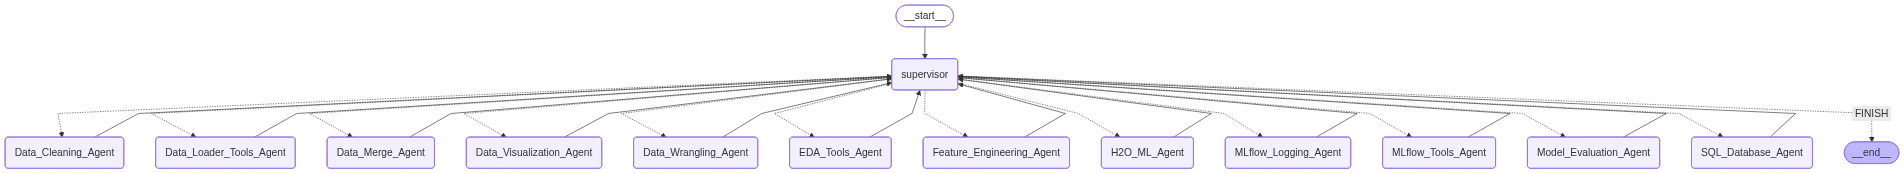

In [4]:
# SQL connection (used if the team needs SQL)

sql_engine = sql.create_engine("sqlite:///data/northwind.db")
conn = sql_engine.connect()

# Sub-agents
workflow_planner_agent = WorkflowPlannerAgent(llm, log=LOG)

data_loader_agent = DataLoaderToolsAgent(
    llm,
    invoke_react_agent_kwargs={"recursion_limit": 4},
)

data_wrangling_agent = DataWranglingAgent(
    model=llm,
    log=LOG,
    log_path=LOG_PATH,
)

data_cleaning_agent = DataCleaningAgent(
    model=llm,
    log=LOG,
    log_path=LOG_PATH,
)

eda_tools_agent = EDAToolsAgent(
    model=llm,
)

data_visualization_agent = DataVisualizationAgent(
    model=llm,
    log=LOG,
    log_path=LOG_PATH,
)

sql_database_agent = SQLDatabaseAgent(
    model=llm,
    connection=conn,
    log=LOG,
    log_path=LOG_PATH,
)

feature_engineering_agent = FeatureEngineeringAgent(
    model=llm,
    log=LOG,
    log_path=LOG_PATH,
)

h2o_ml_agent = H2OMLAgent(
    model=llm,
    log=LOG,
    log_path=LOG_PATH,
)

model_evaluation_agent = ModelEvaluationAgent()

mlflow_tools_agent = MLflowToolsAgent(
    model=llm,
    log_tool_calls=True,
)

# Supervisor team
team = SupervisorDSTeam(
    model=llm,
    workflow_planner_agent=workflow_planner_agent,
    data_loader_agent=data_loader_agent,
    data_wrangling_agent=data_wrangling_agent,
    data_cleaning_agent=data_cleaning_agent,
    eda_tools_agent=eda_tools_agent,
    data_visualization_agent=data_visualization_agent,
    sql_database_agent=sql_database_agent,
    feature_engineering_agent=feature_engineering_agent,
    h2o_ml_agent=h2o_ml_agent,
    mlflow_tools_agent=mlflow_tools_agent,
    model_evaluation_agent=model_evaluation_agent,
    temperature=1.0,
)

team



### Run the Team


## Example 1: Clean and summarize churn


In [5]:
team.invoke_agent(
    user_instructions=(
        f"Load the churn data at path {DATA_PATH}, "
        "clean it (do not remove outliers), "
        "and give me a short churn rate summary table."
    )
)

artifacts = team.get_artifacts()



---SUPERVISOR---
  next_step='load' -> Data_Loader_Tools_Agent
---DATA LOADER---
---DATA LOADER TOOLS AGENT----
    * PREPARE MESSAGES
    * RUN REACT TOOL-CALLING AGENT
    * Tool: load_file | data/churn_data.csv
    * POST-PROCESS RESULTS
    * Tool: load_file | data/churn_data.csv
    * Artifacts captured: ['load_file']
  loader data_raw shape=(21, 5000) active_data_key=data_raw
---SUPERVISOR---
  next_step='clean' -> Data_Cleaning_Agent
---DATA CLEANING---
---DATA CLEANING AGENT----
    * RECOMMEND CLEANING STEPS
    * CREATE DATA CLEANER CODE
    * EXECUTE DATA CLEANER CODE (SANDBOXED)
    * REPORT AGENT OUTPUTS
---SUPERVISOR---
  next_step='eda' -> EDA_Tools_Agent
---EDA TOOLS---
---EXPLORATORY DATA ANALYST AGENT----
    * PREPARE MESSAGES
    * Tool: explain_data
    * POST-PROCESSING EDA RESULTS
    * Tool: explain_data
  eda artifacts keys=None
---SUPERVISOR---
  step 'eda' already attempted -> FINISH


### Response


In [6]:
team.get_ai_message(markdown=True)



The churn data from "data/churn_data.csv" has been loaded and cleaned without removing outliers. A short churn rate summary table has been prepared (though the preview table was not provided).

#### Artifacts


In [7]:
list(artifacts.keys()) if artifacts else None



['data_loader',
 'data_loader_details',
 'data_cleaning',
 'data_cleaning_details',
 'eda']

In [8]:
artifacts['data_cleaning_details']

{'data_cleaner_function': "# Disclaimer: This function was generated by AI. Please review before using.\n# Agent Name: data_cleaning_agent\n# Time Created: 2026-01-28 10:37:51\n\ndef data_cleaner(data_raw):\n    import pandas as pd\n    import numpy as np\n    from sklearn.impute import SimpleImputer\n\n\n\n    data = data_raw.copy()\n\n    # 2. Convert TotalCharges to numeric (coerce errors to NaN)\n    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')\n\n    # 3. Remove columns with more than 40% missing values\n    missing_ratio = data.isna().mean()\n    cols_to_drop = missing_ratio[missing_ratio > 0.40].index\n    data.drop(columns=cols_to_drop, inplace=True)\n\n    # 4. Impute missing values\n    # Identify numeric and categorical columns\n    # Numeric candidates: numeric dtypes\n    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()\n    # Exclude target? No instruction to exclude\n    # Categorical candidates: object type columns\n

## Example 2: Visualize churn by contract


In [9]:
team.invoke_agent(
    user_instructions=(
        "Using the cleaned dataset, plot churn rate by Contract as a bar chart."
    ),
    artifacts=artifacts,
)



---SUPERVISOR---
  next_step='clean' -> Data_Cleaning_Agent
---DATA CLEANING---
---DATA CLEANING AGENT----
    * RECOMMEND CLEANING STEPS
    * CREATE DATA CLEANER CODE
    * EXECUTE DATA CLEANER CODE (SANDBOXED)
    * REPORT AGENT OUTPUTS
---SUPERVISOR---
  next_step='viz' -> Data_Visualization_Agent
---DATA VISUALIZATION---
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
    * EXECUTE DATA VISUALIZATION CODE (SANDBOXED)
    * REPORT AGENT OUTPUTS
---SUPERVISOR---
  all requested steps handled -> FINISH


#### Plotly Graph


In [12]:
plotly_from_dict(team.response.get("viz_graph"))



![Churn Rate by Contract Type](../img/teams_of_agents/churn_rate_by_contract_type.jpg)

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)
